In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading dataset
dataset=load_dataset("lukebarousse/data_jobs")

df=dataset['train'].to_pandas()

In [3]:
df[pd.notna(df.salary_year_avg)]['salary_year_avg']       # the last sq braces print the salary_year_avg column

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

In [4]:
df_salary=df[pd.notna(df['salary_year_avg'])].copy()  

def projected_sal(salary):
    return salary*1.03

df_salary['salary_inflated']=df_salary['salary_year_avg'].apply(projected_sal)
df_salary[['salary_year_avg','salary_inflated']]

,salary_year_avg,salary_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [5]:
# Applying on a column

df_salary=df[pd.notna(df['salary_year_avg'])].copy() 
df_salary['salary_inflated']=df_salary['salary_year_avg'].apply(lambda x:x*1.03)
df_salary[['salary_year_avg','salary_inflated']]

,salary_year_avg,salary_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [6]:
df['job_skills'].dtype

dtype('O')

In [7]:
df


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [8]:
import ast
ast.literal_eval(df['job_skills'][2])

['python',
 'sql',
 'c#',
 'azure',
 'airflow',
 'dax',
 'docker',
 'kubernetes',
 'jenkins']

In [9]:
def cleaned_list(skills):
    if pd.notna(skills):
        return ast.literal_eval(skills)

In [10]:
df['job_skills']=df['job_skills'].apply(cleaned_list)


In [11]:
print(df['job_skills'][0])

None


In [12]:

# converting  str to container [list]

df['job_skills']=df['job_skills'].apply( lambda skills: ast.literal_eval(skills)
                                         if isinstance(skills,str) and pd.notna(skills) 
                                         else skills )
type(df['job_skills'][0])

NoneType

<Axes: ylabel='job_skills'>

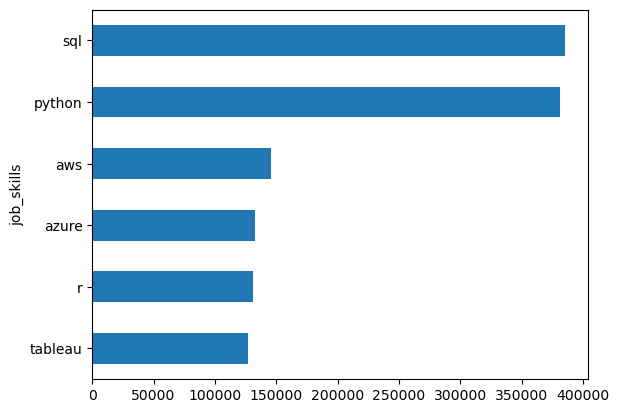

In [13]:

    # .explode()        
    # replicates index and explodes lists to rows

df_exploded=df.explode('job_skills')
df_exploded['job_skills'].value_counts(ascending=True).tail(6).plot(kind='barh')

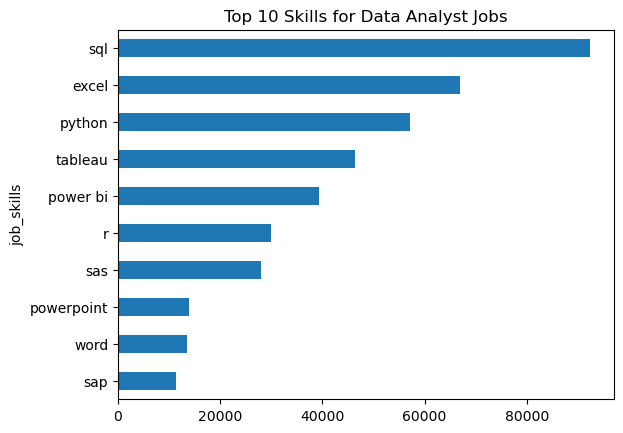

In [32]:
# convert a series to df
# .reset_index)()

df_exploded_final=df_exploded.groupby(['job_title_short','job_skills']).size().reset_index(name='skill count').sort_values(by='skill count', ascending=False)
job_title='Data Analyst'
top_skill=10
df_final=df_exploded_final[df_exploded_final['job_title_short']==job_title].head(top_skill)
df_final.plot(kind='barh',x='job_skills',y='skill count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skill} Skills for {job_title} Jobs' )
plt.legend().set_visible(False)